## Qusetion 1

(a). Please fill in the missing code to train 3 different MLPs. And then compare their accuracy values by plotting a bar chart.

In [2]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cpu")


train_transform = transforms.Compose([ transforms.ToTensor(),
                                    ])

test_transform = transforms.Compose([transforms.ToTensor(),
                                    ])

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=train_transform)

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=5,pin_memory=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False,num_workers=5,pin_memory=True)

def train(epoch, log_interval=200):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        outputs = model(data)

        ## calculate loss
        loss = criterion(outputs, target)

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

C:\Users\lion\anaconda3\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
<ipython-input-4-856e43e1bfb6>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307893
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.300631
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.297479
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.302815
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.296555

Validation set: Average loss: 2.2955, Accuracy: 1135/10000 (11.35%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.297109
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.298548
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.292517
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.294955
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.254480

Validation set: Average loss: 2.2792, Accuracy: 1703/10000 (17.03%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.301501
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.277588
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.279097
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.256448
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.220828

Validation set: Average loss: 2.2274, Accuracy: 2141/10000 (21.41%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.247127
Train Epoc

<ipython-input-4-856e43e1bfb6>:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301659
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.295807
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.287335
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.254032
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.204195

Validation set: Average loss: 2.1574, Accuracy: 4591/10000 (45.91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.181053
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.975865
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.952410
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.875453
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.934577

Validation set: Average loss: 1.8507, Accuracy: 6595/10000 (65.95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.871477
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.887918
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.820065
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.899580
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.874031

Validation set: Average loss: 1.8085, Accuracy: 6697/10000 (66.97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.795615
Train Epoc

<ipython-input-4-856e43e1bfb6>:74: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.305587
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.295967
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.278824
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.243491
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.153301

Validation set: Average loss: 2.1332, Accuracy: 4235/10000 (42.35%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.121574
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.077728
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.021989
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.952687
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.921813

Validation set: Average loss: 1.8758, Accuracy: 6385/10000 (63.85%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.892058
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.971460
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.838469
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.746615
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.757621

Validation set: Average loss: 1.7730, Accuracy: 7453/10000 (74.53%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.821830
Train Epoc

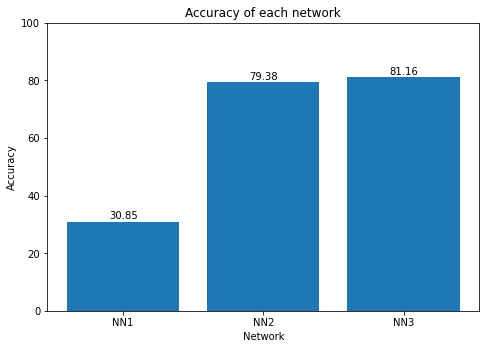

In [4]:


batch_size = 64




class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to sigmoid activation function.
        x = F.sigmoid(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x)
        return x

    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to relu activation function.
        x = F.relu(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x)
        
        return x    

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 16)
        self.fc2 = nn.Linear(16, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to relu activation function.
        x = F.relu(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x)
        
        return x   
    


    
acc_result = []
model_label = ["NN1", "NN2", "NN3"]

## Trainig and evaluating 1) MLP
model = Net1().to(device, non_blocking=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result.append(accv[4].item())
    
## Trainig and evaluating 2) MLP
model = Net2().to(device, non_blocking=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result.append(accv[4].item())

## Trainig and evaluating 3) MLP
model = Net3().to(device, non_blocking=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result.append(accv[4].item())

## Show barchart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bars = ax.bar(model_label, acc_result)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+ 0.3, yval + 1, round(yval,2))
ax.set_ylim(0, 100)
plt.title('Accuracy of each network')
plt.xlabel('Network')
plt.ylabel('Accuracy')
plt.show()





(b). Please change the batch size and learning rate to train (2) MLP (Net2）as above. And then compare their accuracy values by plotting a matrix with values and colormap. Please note that each time you change the setting and train the MLP, you need to initialize the model again (e.g. "model = Net2().to(device)"). 

In [2]:
acc_result2 = []

## Trainig and evaluating 2) MLP with the firt setting

batch_size = 64

## construct the loader for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=5,pin_memory=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False,num_workers=5,pin_memory=True)

model = Net2().to(device, non_blocking=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result2.append(accv[epochs-1].item())


## Trainig and evaluating 2) MLP with the second setting

batch_size = 64

## construct the loader for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=5,pin_memory=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False,num_workers=5,pin_memory=True)

model = Net2().to(device, non_blocking=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result2.append(accv[epochs-1].item())

## Trainig and evaluating 2) MLP with the third setting

batch_size = 64

## construct the loader for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=5,pin_memory=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False,num_workers=5,pin_memory=True)

model = Net2().to(device, non_blocking=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result2.append(accv[epochs-1].item())

## Trainig and evaluating 2) MLP with the fourth setting

batch_size = 128

## construct the loader for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=5,pin_memory=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False,num_workers=5,pin_memory=True)

model = Net2().to(device, non_blocking=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result2.append(accv[epochs-1].item())

## Trainig and evaluating 2) MLP with the fifth setting

batch_size = 128

## construct the loader for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=1,pin_memory=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False,num_workers=1,pin_memory=True)

model = Net2().to(device, non_blocking=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result2.append(accv[epochs-1].item())

## Trainig and evaluating 2) MLP with the sixth setting

batch_size = 128

## construct the loader for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=5,pin_memory=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False,num_workers=5,pin_memory=True)

model = Net2().to(device, non_blocking=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result2.append(accv[epochs-1].item())

<ipython-input-1-c69cbaecee49>:136: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.330856
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.920848
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.829149
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.789532
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.758618

Validation set: Average loss: 1.7019, Accuracy: 9259/10000 (92.59%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.723040
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.747517
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.723246
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.676026
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.674583

Validation set: Average loss: 1.6252, Accuracy: 9426/10000 (94.26%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.667649
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.626793
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.651531
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.613439
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.624928

Validation set: Average loss: 1.5897, Accuracy: 9515/10000 (95.15%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.604702
Train Epoc

In [ ]:
np_acc = np.array(acc_result2)
#reshape np array
np_acc = np_acc.reshape(2,3)

#Set labels
column_labels = [0, 64, 128]
row_labels = [0, 0.005, 0.01, 0.02]

#Make axes and fig
fig, ax = plt.subplots()

#Display actual values of row and column
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)


#set label and title
plt.xlabel("learning rate", labelpad = 10)
plt.ylabel("batch size")
ax.xaxis.set_label_position('top')
plt.title('Accuracy of each setting', pad = 40)

#plot
ax.matshow(np_acc, cmap=plt.cm.Blues)

#add text
for i in range(3):
    for j in range(2):
        c = round(np_acc[j,i], 2)
        ax.text(i, j, str(c), va='center', ha='center', color = 'red')

## Question 2

Please use “dropout”, “batch normalization” and any “data augmentation” to train to improve the accuracy of (2) MLP (Net2）in Question 1 a. (Batch size is 64 and learning rate is 0.01). Please describe clearly your design choices.

In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

batch_size = 64

train_transform = transforms.Compose([transforms.RandomRotation(10),
                                     #torchvision.transforms.RandomCrop(28, padding = 1),
                                     transforms.ToTensor(),])

test_transform = transforms.Compose([transforms.ToTensor(),
                                    ])

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=train_transform)

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False,num_workers=5,pin_memory=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False,num_workers=5,pin_memory=True)

def train(epoch, log_interval=200):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        outputs = model(data)

        ## calculate loss
        loss = criterion(outputs, target)

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

def validate(loss_vector, accuracy_vector):
    pred_all = []
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        pred_all.extend(pred)
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))
    pred_all = np.array(pred_all)
    return pred_all





class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.drop1 = nn.Dropout(0.25)
        self.drop2 = nn.Dropout(0.1)
        self.norm1 = nn.BatchNorm1d(128, momentum=0.1, eps=1e-05) #just default value...
        self.norm2 = nn.BatchNorm1d(10, momentum=0.1, eps=1e-05) #just default value...

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        

        
        ## forward x to relu activation function.
        x = F.relu(x)
        
        x = self.norm1(x)
        
        #x = self.drop1(x)
        
            
        
        

        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        x = self.norm2(x)
        
        #x = self.drop2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x)
        
        return x

## Trainig and evaluating 2) MLP
model = Net2().to(device, non_blocking=True)
optimizer = torch.optim.Adam(model.parameters())

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 20
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    pred_all = validate(lossv, accv)
np.save('results.npy',pred_all)

print(np.shape(pred_all))

<ipython-input-1-c69cbaecee49>:136: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311200
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.765095
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.687077
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.644986
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.618163

Validation set: Average loss: 1.5674, Accuracy: 9578/10000 (95.78%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.578018
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.627326
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.572060
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.546303
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.555212

Validation set: Average loss: 1.5273, Accuracy: 9670/10000 (96.70%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.528129
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.583488
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.563961
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.518882
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.517314

Validation set: Average loss: 1.5133, Accuracy: 9705/10000 (97.05%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.512720
Train Epoc

## Question 3

Please complete the missing code to use RBM to initialize the parameters of the (1) MLP (Net1) in Question 1 a. Compare the accuracy values with and without RBM pretraining by plotting a bar chart.

In [2]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

batch_size = 64

train_transform = transforms.Compose([ transforms.ToTensor(),
                                    ])

test_transform = transforms.Compose([transforms.ToTensor(),
                                    ])

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=train_transform)

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=1,pin_memory=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False,num_workers=1,pin_memory=True)


class RBM():

    def __init__(self, num_visible, num_hidden, k, learning_rate=0.1):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.k = k
        self.learning_rate = learning_rate

        self.weights = torch.randn(num_visible, num_hidden) * 0.01
        self.visible_bias = torch.ones(num_visible) * 0.01
        self.hidden_bias = torch.zeros(num_hidden)
        
    def _sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def _random_probabilities(self, num):
        random_probabilities = torch.rand(num)
        return random_probabilities
    
## compute the probability of hidden nodes given visible nodes.
    def compute_hidden(self, visible_probabilities):
        
        hidden_activations = torch.matmul(visible_probabilities, self.weights) + self.hidden_bias
        
        hidden_probabilities = self._sigmoid(hidden_activations)
        return hidden_probabilities

## compute the probability of visible nodes given hidden nodes.
    def compute_visible(self, hidden_probabilities):
        
        visible_activations = torch.matmul(hidden_probabilities, self.weights.t()) + self.visible_bias
        
        visible_probabilities = self._sigmoid(visible_activations)
        return visible_probabilities
    
## Contrastive Divergence (CD-k)
    def contrastive_divergence(self, input_data):
        
        positive_hidden_probabilities = self.compute_hidden(input_data)
        
        ## sample a hidden activation vector from its probability distribution
        positive_hidden_activations = (positive_hidden_probabilities >= self._random_probabilities(self.num_hidden)).float()
        
        ## compute the positive gradient
        positive_associations = torch.matmul(input_data.t(), positive_hidden_activations)

        hidden_activations = positive_hidden_activations

        for step in range(self.k):
            visible_probabilities = self.compute_visible(hidden_activations)
            hidden_probabilities = self.compute_hidden(visible_probabilities)
            
            ## resample a hidden activation vector from its probability distribution
            hidden_activations = (hidden_probabilities >= self._random_probabilities(self.num_hidden)).float()

        negative_visible_probabilities = visible_probabilities
        negative_hidden_probabilities = hidden_probabilities
        
        ## compute the nagetive gradient
        negative_associations = torch.matmul(negative_visible_probabilities.t(), negative_hidden_probabilities)
        
        batch_size = input_data.size(0)
        
        ## update weights
        self.weights += (positive_associations - negative_associations) * (self.learning_rate / batch_size)
        
        ## update bias of visible units
        self.visible_bias += torch.sum(input_data - negative_visible_probabilities, dim=0) * (self.learning_rate / batch_size)

        ## update bias of hidden units
        self.hidden_bias += torch.sum(positive_hidden_probabilities - negative_hidden_probabilities, dim=0) * (self.learning_rate / batch_size)
        
        ## compute reconstruction error
        error = torch.mean((input_data - negative_visible_probabilities)**2)

        return error

BATCH_SIZE = 64
VISIBLE_UNITS = 784  # 28 x 28 images
HIDDEN_UNITS = 128
CD_K = 3
EPOCHS = 5

########## TRAINING RBM ##########
print('Training RBM...')

rbm = RBM(VISIBLE_UNITS, HIDDEN_UNITS, CD_K)

for epoch in range(EPOCHS):
    epoch_error = 0.0
    num_batch = 0
    for batch, _ in train_loader:
        batch = batch.view(len(batch), VISIBLE_UNITS)  # flatten input data

        batch_error = rbm.contrastive_divergence(batch)
        epoch_error += batch_error
        num_batch = num_batch + 1

    print('Epoch Error (epoch=%d): %.4f' % (epoch, epoch_error/num_batch))

Training RBM...
Epoch Error (epoch=0): 0.0438
Epoch Error (epoch=1): 0.0296
Epoch Error (epoch=2): 0.0262
Epoch Error (epoch=3): 0.0243


KeyboardInterrupt: 

We now check whether the trained RBM model can extract features from the images.

We calculate the probability of hidden nodes given input MNIST data as features and use a SciPy-based logistic regression for classification.

In [ ]:
from sklearn.linear_model import LogisticRegression

print('Extracting features...')

train_features = np.zeros((len(train_dataset), HIDDEN_UNITS))
train_labels = np.zeros(len(train_dataset))
test_features = np.zeros((len(validation_dataset), HIDDEN_UNITS))
test_labels = np.zeros(len(validation_dataset))

for i, (batch, labels) in enumerate(train_loader):
    batch = batch.view(len(batch), VISIBLE_UNITS)  # flatten input data
    try:
        train_features[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = rbm.compute_hidden(batch).numpy()
        train_labels[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = labels.numpy()
    except:
        size = len(train_dataset) - i*BATCH_SIZE
        train_features[i*BATCH_SIZE:len(train_dataset)] = rbm.compute_hidden(batch).numpy()[0:size]
        train_labels[i*BATCH_SIZE:len(train_dataset)] = labels.numpy()[0:size]        

for i, (batch, labels) in enumerate(validation_loader):
    batch = batch.view(len(batch), VISIBLE_UNITS)  # flatten input data
    try:
        test_features[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = rbm.compute_hidden(batch).numpy()
        test_labels[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = labels.numpy()
    except:
        size = len(test_dataset) - i*BATCH_SIZE
        test_features[i*BATCH_SIZE:len(test_dataset)] = rbm.compute_hidden(batch).numpy()[0:size]
        test_labels[i*BATCH_SIZE:len(test_dataset)] = labels.numpy()[0:size]  


########## CLASSIFICATION ##########
print('Classifying...')

clf = LogisticRegression()
clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)

print('Classification Accuracy: %d/%d' % (sum(predictions == test_labels), test_labels.shape[0]))

In [ ]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        ## initialize the paramaters with the weights and hidden_bias in trained RBM.
        self.fc1.weight = nn.Parameter(torch.transpose(rbm.weights,1,0))
        self.fc1.bias = nn.Parameter(rbm.hidden_bias)
        
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to sigmoid activation function.
        x = F.sigmoid(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x)
        return x
        
        return x     
    
def train(epoch, log_interval=200):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        outputs = model(data)

        ## calculate loss
        loss = criterion(outputs, target)

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))
    
## Trainig and evaluating 1) MLP
model = Net1().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
acc_result3 = []
acc_result3.append(acc_result[0])
acc_result3.append(accv[4])


model_label2 = ["without RBN", "with RBN"]





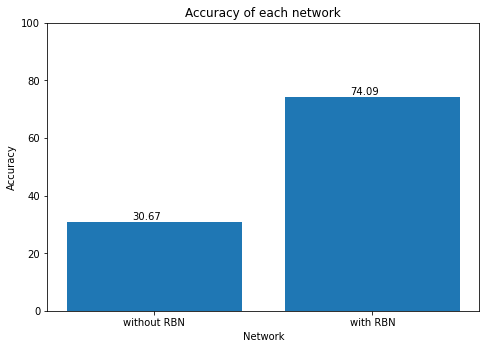

In [13]:
## Show barchart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bars = ax.bar(model_label2, acc_result3)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+ 0.3, yval + 1, round(yval,2))
ax.set_ylim(0, 100)
plt.title('Accuracy of each network')
plt.xlabel('Network')
plt.ylabel('Accuracy')
plt.show()